In [44]:
import os
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("gdp.csv")

In [3]:
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


## Deal With Null value

In [5]:
df.isna().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [6]:
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


## Description of each column

In [7]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [8]:
df['Country Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [9]:
df['Year'].describe()

count    11507.000000
mean      1991.265230
std         15.886648
min       1960.000000
25%       1978.000000
50%       1993.000000
75%       2005.000000
max       2016.000000
Name: Year, dtype: float64

In [10]:
df['Value'].describe()

count    1.150700e+04
mean     1.005972e+12
std      4.533056e+12
min      8.824448e+06
25%      2.056874e+09
50%      1.436880e+10
75%      1.796394e+11
max      7.904923e+13
Name: Value, dtype: float64

In [11]:
df['Year'].max()

2016

In [12]:
df['Year'].min()

1960

## Analysing Arab World

In [13]:
df.head(3)

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10


In [14]:
df[(df["Country Name"]=="Arab World")]['Year'].max()

2016

In [15]:
df[(df["Country Name"]=="Arab World")]['Year'].min()

1968

In [16]:
df_pr=df[(df["Country Name"]=="Arab World")]

<Axes: title={'center': 'Arab World GDP'}, xlabel='Years', ylabel='GDP'>

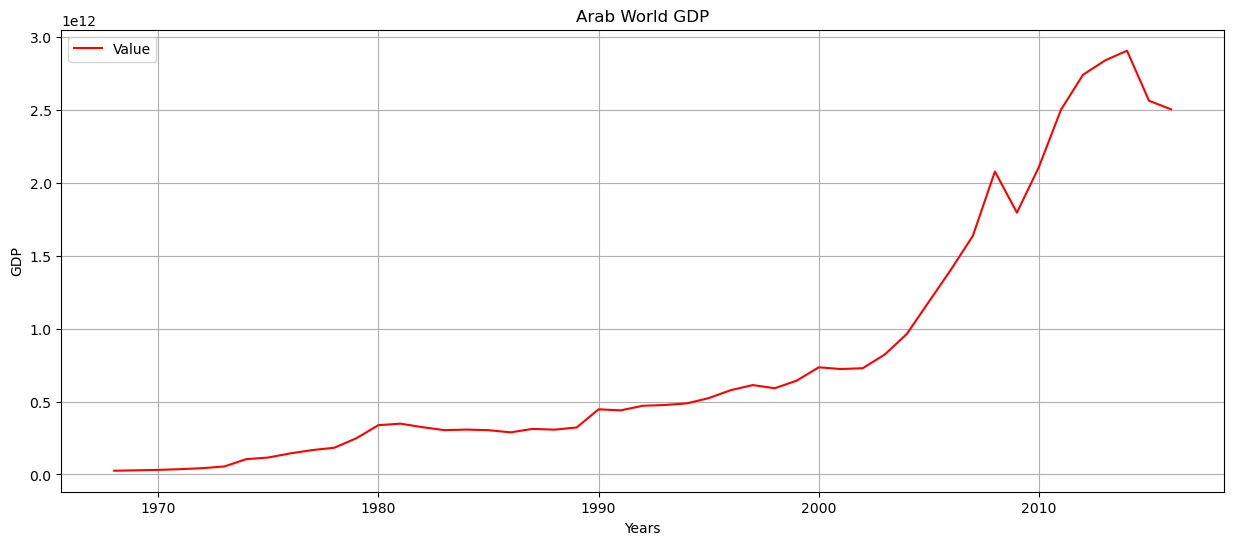

In [17]:
df_pr.plot(kind='line',x='Year',y='Value',figsize=(15,6),grid=True,color='red',ylabel='GDP',xlabel='Years',title='Arab World GDP')


## Analysing India GDP

In [18]:
df.head(3)

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10


In [19]:
df_India=df[df["Country Name"] =="India"]

<Axes: xlabel='Year', ylabel='GDP'>

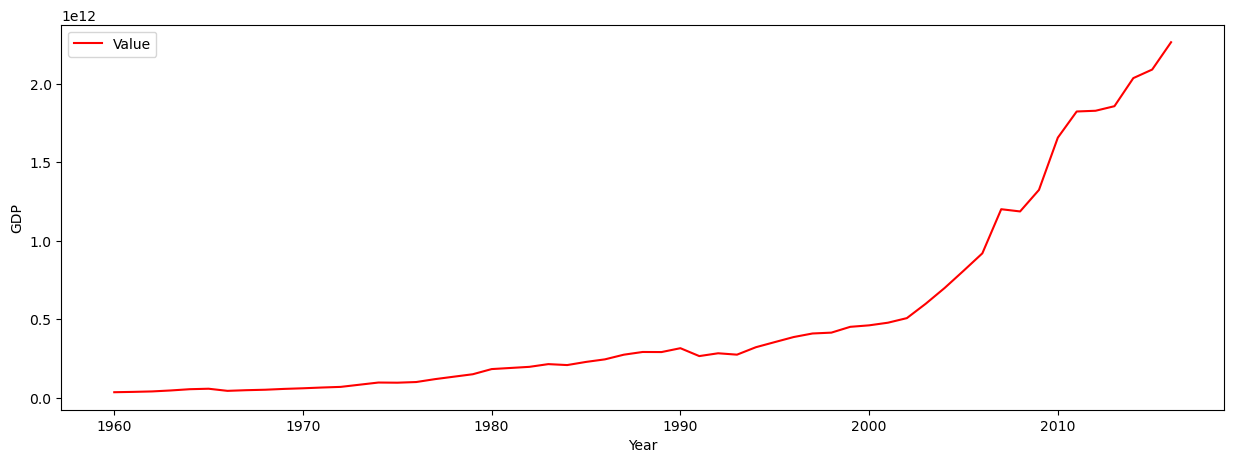

In [20]:
df_India.plot(kind='line',x='Year',y='Value',figsize=(15,5),color='red',xlabel='Year',ylabel='GDP')

### Find GDP Growth of India

In [21]:
data=df_India.values

In [22]:
gdp_change=[0]
for i in range(1,len(data)):
    prev=data[i-1][3]
    curr=data[i][3]
    gdp_change.append(round(((curr-prev)/prev)*100,2))
    
df_India.assign(GDP=gdp_change)

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64
6079,India,IND,1965,5.876042e+10,5.44
6080,India,IND,1966,4.525364e+10,-22.99
6081,India,IND,1967,4.946617e+10,9.31
6082,India,IND,1968,5.237732e+10,5.89
6083,India,IND,1969,5.766833e+10,10.10


## Find GDP Growth Of Every World

In [23]:
final_data=[]
for country_name in df['Country Name'].unique():
    df_pr=df[df['Country Name'] == country_name]
    data=df_pr.values
    gdp_change=[0]
    for i in range(1,len(data)):
        prev=data[i-1][3]
        curr=data[i][3]
        
        gdp_change.append(round(((curr - prev)/prev)*100,2))
    df_pr=df_pr.assign(GDP=gdp_change)
    final_data.append(df_pr)

In [24]:
df=pd.concat(final_data,axis=0)

In [25]:
df.groupby('Country Name').max('Value').sort_values(by='Value', ascending=False).head(10)


,Year,Value,GDP
Country Name,,,
World,2016,7.904923e+13,21.86
High income,2016,5.036240e+13,21.37
OECD members,2016,4.937008e+13,21.22
Post-demographic dividend,2016,4.673504e+13,22.12
IDA & IBRD total,2016,2.948247e+13,27.23
Low & middle income,2016,2.870476e+13,27.85
Middle income,2016,2.829277e+13,28.18
IBRD only,2016,2.739661e+13,28.70
Europe & Central Asia,2016,2.365470e+13,36.49


## World GDP Analysis

In [29]:
df_pr=df[df['Country Name']=='India']
fig=px.line(df_pr,x='Year',y='Value',title='India GDP Analysis')
fig

## GDP OF EACH COUNTRY

In [43]:
output_dir = 'GDP Individual/'
for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    
    fig = px.line(df_pr, x='Year', y='Value', title=country_name + ' GDP Analysis')
    pyo.plot(fig, filename=output_dir+country_name+'.html', auto_open=False)

## GDP OF EACH COUNTRY WRT WORLD

In [52]:
output_dir = 'GDP INDIVIDUAL WRT WORLD'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for country_name in df['Country Name'].unique():
    df_pr=df[df['Country Name']==country_name]
    fig=px.line(df_pr,x='Year',y='Value',title='country_name'+'GDP Analysis',range_y=[0,8000000000000])
    pyo.plot(fig,filename='GDP INDIVIDUAL WRT WORLD/'+country_name+'.html',auto_open=False)

## GDP OF ALL COUNTRY

In [55]:
fig=px.line(df,x='Year',y='Value',title='GDP Analysis of All Countries',color='Country Name')
pyo.plot(fig,filename='Countries GDP.html')

'Countries GDP.html'

## Comparision of India & China

In [61]:
c1=df[df['Country Name']=='China']
c2=df[df['Country Name']=='India']

df_pr=pd.concat([c1,c2],axis=0)
fig=px.line(df_pr,x='Year',y='Value',title='GDP Comparision | India and China',color='Country Name')

pyo.plot(fig,filename='INDCHN.html')

'INDCHN.html'

## GDP Growth Between 1960-2016

In [65]:
df=pd.concat(final_data,axis=0)

dfs = []
for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    
    if len(df_pr) == 57:
        dfs.append(df_pr)

df_pr = pd.concat(dfs, axis=0)
fig = px.line(df_pr, x='Year', y='GDP', title='GDP Growth', color='Country Name')
pyo.plot(fig, filename='GDP Growth.html', auto_open=False)

'GDP Growth.html'